In [13]:
#import library
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#notch function
def notch_reject_filter(shape, d0=9, u_k=0, v_k=0):
    P, Q = shape
    #insialisasi filter dengan 0
    H = np.zeros((P, Q))

    #Traverse lewat filter
    for u in range(0, P):
        for v in range(0, Q):
            #Dapetin jarak euclidean dari titik D(u,v) ke tengah
            D_uv = np.sqrt((u - P / 2 + u_k) ** 2 + (v - Q / 2 + v_k) ** 2)
            D_muv = np.sqrt((u - P / 2 - u_k) ** 2 + (v - Q / 2 - v_k) ** 2)

            if D_uv <= d0 or D_muv <= d0:
                H[u, v] = 0.0
            else:
                H[u, v] = 1.0

    return H

In [15]:
#import foto
img = cv2.imread('/content/Input-test-images-a-Cameraman-grayscale-b-grayscale-Lena-and-c-color-Lena-All_Q640.jpg', 0)

In [16]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
phase_spectrumR = np.angle(fshift)
magnitude_spectrum = 20*np.log(np.abs(fshift))

In [17]:
#dapetin shape image
img_shape = img.shape

In [19]:
#memanggil function notch
H1 = notch_reject_filter(img_shape, 4, 38, 30)
H2 = notch_reject_filter(img_shape, 4, -42, 27)
H3 = notch_reject_filter(img_shape, 2, 80, 30)
H4 = notch_reject_filter(img_shape, 2, -82, 28)

In [21]:
#perhitungan
NotchFilter = H1*H2*H3*H4
NotchRejectCenter = fshift * NotchFilter 
NotchReject = np.fft.ifftshift(NotchRejectCenter)
inverse_NotchReject = np.fft.ifft2(NotchReject)

In [11]:
Result = np.abs(inverse_NotchReject)

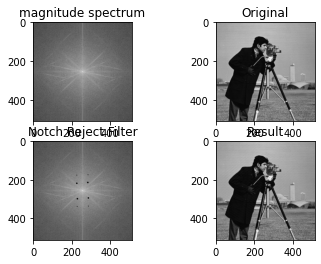

In [22]:
#Plotting

#Original Img
plt.subplot(222)
plt.imshow(img, cmap='gray')
plt.title('Original')

#Magnitude spectrum image
plt.subplot(221)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('magnitude spectrum')

#Notch Reject FIlter image
plt.subplot(223)
plt.imshow(magnitude_spectrum*NotchFilter, "gray") 
plt.title("Notch Reject Filter")

#Resultnya
plt.subplot(224)
plt.imshow(Result, "gray") 
plt.title("Result")


plt.show()